# Capstone Analytic Report

Thinkful Prep Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/01/26


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import us
from collections import Counter
from operator import itemgetter
import seaborn as sns

%matplotlib inline
sns.set_style('dark')

# American Small Craft Canned Beers

Before Prohibition the United States had 4, 131 breweries. Most of which were small locally owned, catering to their small town or city.   Prohibition killed off many breweries with only the very large able to stay in business after converting to the manufacture of soda and root beer. 
After the 21st amendment (repeal of Prohibition) was passed only a hand full of companies survived such as Anheuser Bush, Miller and Pabst.  American beer has had a bad reputation throughout the World as being weak and tasting like water. Those from the United Kingdom have also complained that most American beers are too Hoppy.

Since the 1970’s breweries have made a comeback in the United States, with 3,000 now operating varying in size from brew pubs to large industry giants.  In 2012 the United States produced 916 million barrels (23.0 GL or 87 liters) of beer. Interestingly as of 2014 the United States is ranked 17th in the world in annual per capita consumption of beer with 75.8 liters. In comparison, the Czech Republic is ranked first with a per capita consumption of 142.6 liters.

With data obtained from Jean-Nicholos Hould’s Kaggle web page and his dataset of 2410 craft beers I investigated how this resurgence of brewing has had on the type of beers produced and the alcohol content.  

## 1. Analytic Questions

 a) What is the average alcohol by volume for American craft beers?
 
 b) Which states produce the most craft beers?
 
 c) What is the average IBU of the craft beers? Is there an association between between ABV and IBU for this set of beers? 

## 2. Data Description

Hould’s data is comprised of two CSV files. The first file contains meta-data on the breweries; unique identifier, the name of brewery, city and state of brewery.  The second file contains data on beers produced by breweries in the first file with 2,410 observations and 8 categories. 

    1. ABV -  Achohol by Volume
    2. IBU - International Bittering Units with 20 - 45 being mild to pronounced hops and those 45 or greater are   heavily hopped.
    3. Brewery ID – Unique identify tying the beer back to the brewery
    4. Name – Name of the beer produced
    5. Style – Type of beer (i.e., IPA, Lager)
    6. Ounces – The number of oz contained in can for the type of beer

The data was retrieved by Jean-Nicholos Hould's web scrapper from the site http://craftcans.com/db.php?search=all&sort=beerid&ord=desc&view=text. He wrote a blog about the details of the scrapping process which can be accessed from the reference section.

This data set is not complete, without doubt there are possibly many breweries not list on the craftcans website. One important point about the data is that this pertains only to cans of beer not bottles. I am not aware why Hould or those creating the website at craftcan limit craft beer only to those produced in cans.


Having moved recently from the East coast to the Midwest one of first things I noticed was the number of breweries and the prevalence of beer drinking over wine and liquor.  The number and popularity of craft beers seemed to have taken off in late 90’s and 2000s.  Alcohol consumption has been an important aspect of American Cultural History making the investigation into the current state of American craft beers more interesting.

In [4]:
beer_df = pd.read_csv('beers.csv')
beer_df.shape

(2410, 8)

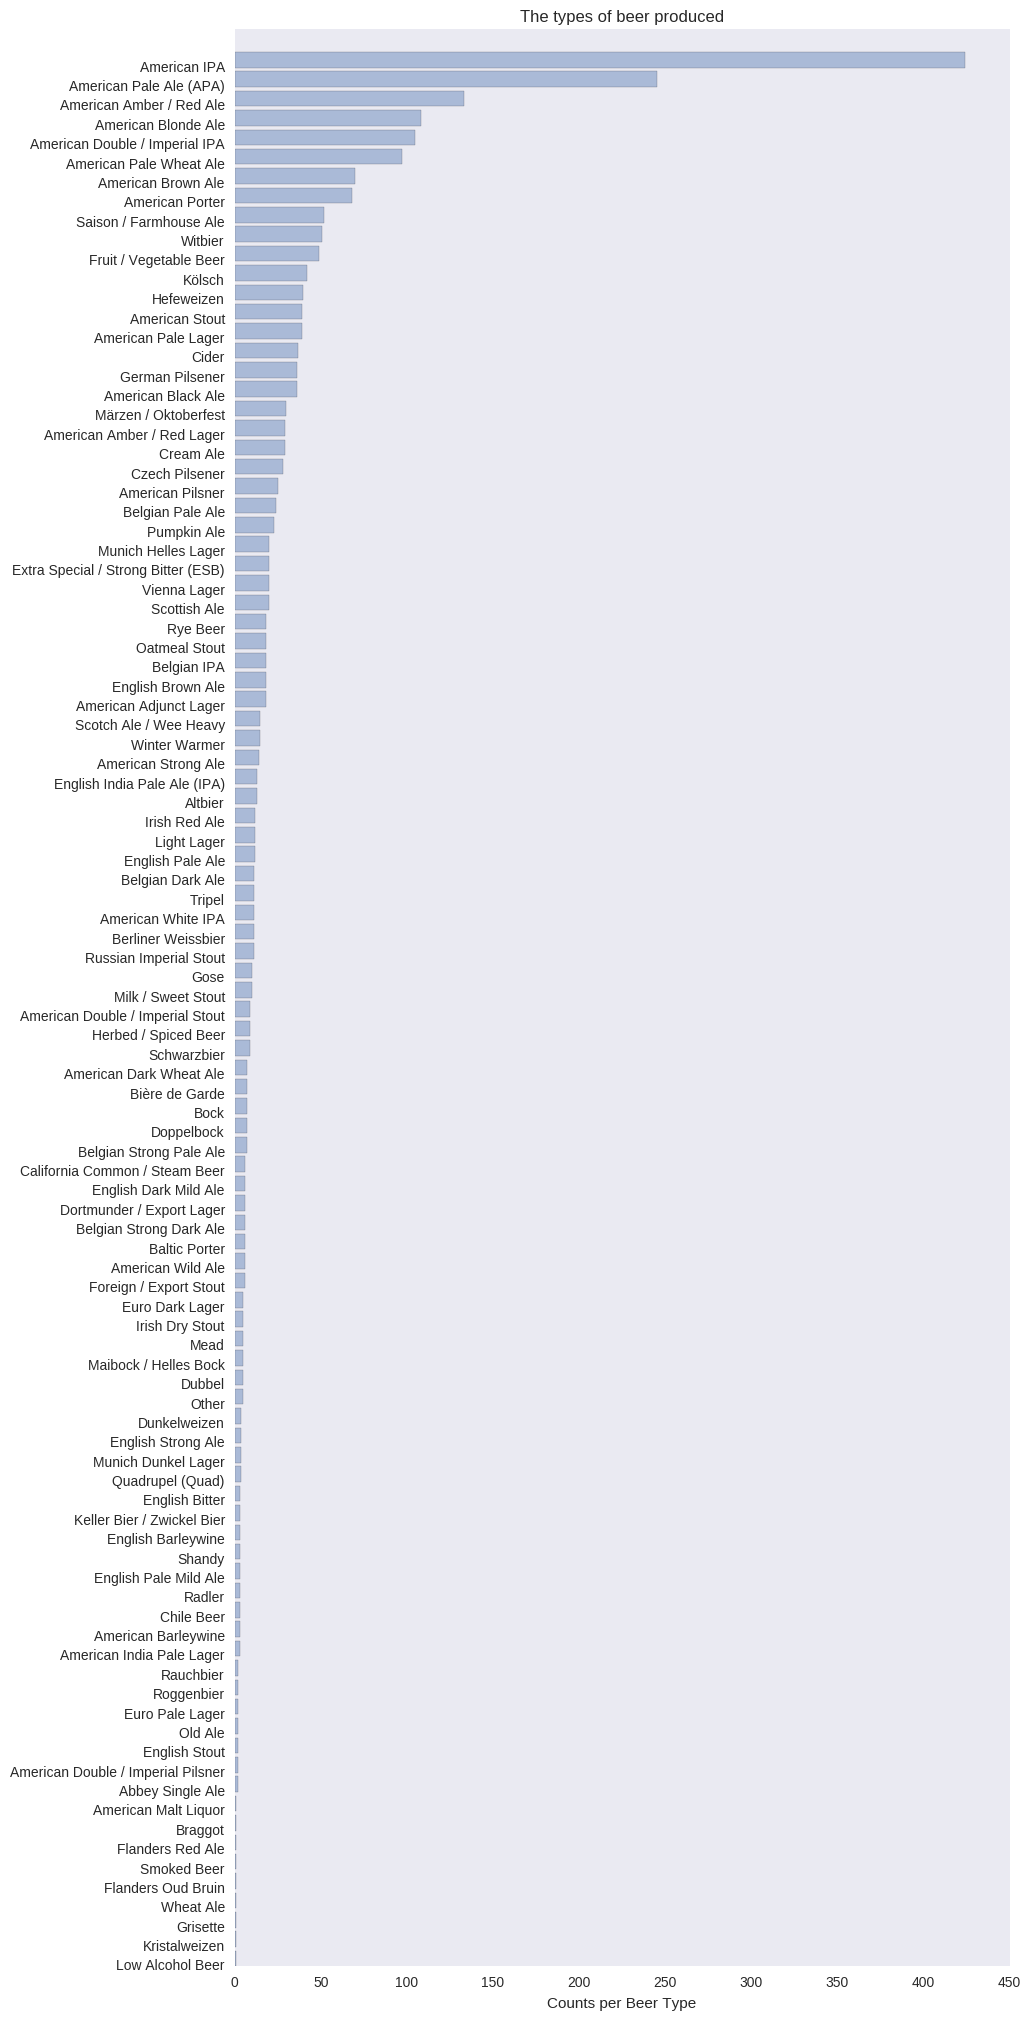

The 5 most common types of beers are :

American IPA                     : 424
American Pale Ale (APA)          : 245
American Amber / Red Ale         : 133
American Blonde Ale              : 108
American Double / Imperial IPA   : 105


In [6]:
beer_types = Counter(beer_df['style'])
beer_list = sorted(beer_types.items(), key=lambda pair: pair[1])
keys = [x[0] for x in beer_list]
y_pos = np.arange(len(keys))
types = [t[1] for t in beer_list]
plt.figure(figsize=(10,25))
plt.barh(y_pos, types, alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Counts per Beer Type')
plt.title('The types of beer produced')
plt.show()

print('The 5 most common types of beers are :\n')
result = beer_types.most_common(5)
for item in result:
    print('{:32s} : {:3d}'.format(item[0], item[1]))

Ale and Indian Pale Ales are the king of canned craft beer. For brevity, the term IPA will be used for both American IPA and American Pale ale types.

###  What is the average alcohol by volume for American craft beers?

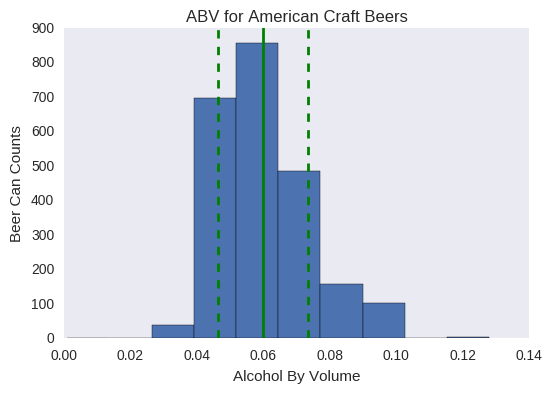

mean               : 0.060
standard deviation : 0.014


In [9]:
mean = sum(beer_df['abv'].dropna())/len(beer_df['abv'].dropna())
sd = np.std(beer_df['abv'].dropna(), ddof=1)
plt.hist(beer_df['abv'].dropna())
plt.axvline(mean, color='g', linestyle='solid', linewidth=2)
plt.axvline(mean + sd, color='g', linestyle='dashed', linewidth=2)
plt.axvline(mean - sd, color='g', linestyle='dashed', linewidth=2)
plt.xlabel('Alcohol By Volume')
plt.ylabel('Beer Can Counts')
plt.title('ABV for American Craft Beers')
plt.show()
print('{:18s} : {:3.3f}'.format('mean', mean))
print('{:18s} : {:3.3f}'.format('standard deviation', sd))

The average ABV for the craft beers is 6 %. Considering that most of the beer types in the dataset are IPA’s this is not surprising. The ABV of a beer is largely a function of how the beer is brewed or the type of beer. IPA's can have ABVs within the range of 4.0 to 6.5 %.  For comparison Budweiser and Miller Lite alcohol by volume is 5.0 and 4.2 percent. 

###  Which states produce the most craft beers?

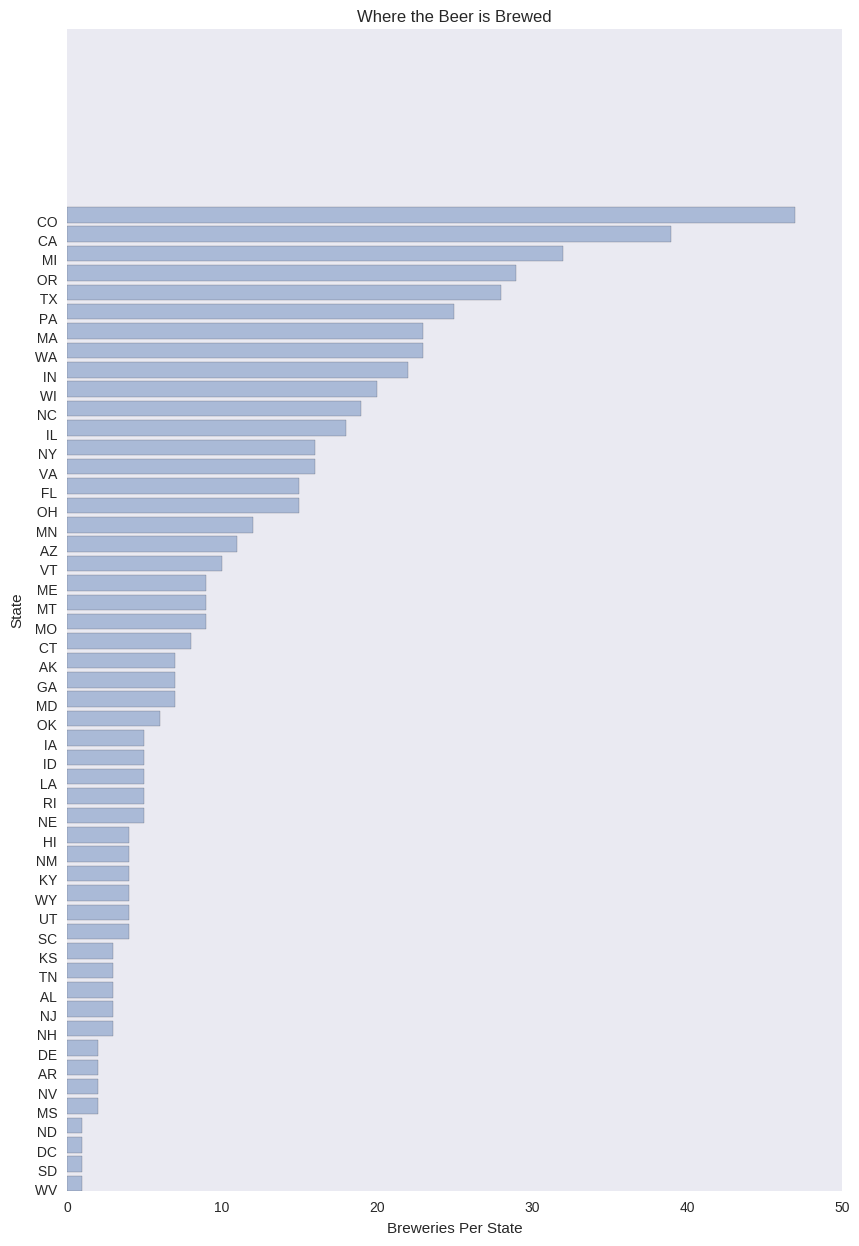

The top 15 states with the most breweries :

Colorado        :  47
California      :  39
Michigan        :  32
Oregon          :  29
Texas           :  28
Pennsylvania    :  25
Washington      :  23
Massachusetts   :  23
Indiana         :  22
Wisconsin       :  20
North Carolina  :  19
Illinois        :  18
Virginia        :  16
New York        :  16
Ohio            :  15


In [10]:
breweries_df = pd.read_csv('breweries.csv')
breweries = Counter(breweries_df['state'])
brewery_list = sorted(breweries.items(), key=lambda pair: pair[1])
keys = [x[0] for x in brewery_list]
y_pos = np.arange(len(keys))
counts = [c[1] for c in brewery_list]
plt.figure(figsize=(10,15))
plt.barh(y_pos, counts, alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Breweries Per State')
plt.ylabel('State')
plt.title('Where the Beer is Brewed')
plt.show()
print('The top 15 states with the most breweries :\n')
result = breweries.most_common(15)
for item in result:
    name = us.states.lookup(item[0].strip()).name
    print('{:15s} : {:3d}'.format(name, item[1]))

Clearly from this data most of the breweries are located in the Northwest, with the mid Atlantic region running in second place.  Interestingly from the bar chart both Rhode Island and Hawaii have at least 6 breweries each considering their small areas. Important to note here is that only canned beer from these breweries are considered. The true number is probably much higher.

###  What is the average IBU of the craft beers? Is there an association between between ABV and IBU for this set of beers? 

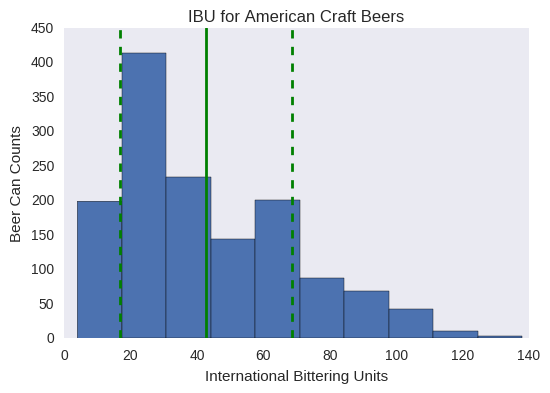

median             : 35.00
mean               : 42.713
standard deviation : 25.954
max                : 138.00
min                : 4.00


In [11]:
mean = sum(beer_df['ibu'].dropna())/len(beer_df['ibu'].dropna())
sd = np.std(beer_df['ibu'].dropna(), ddof=1)
plt.hist(beer_df['ibu'].dropna())
plt.axvline(mean, color='g', linestyle='solid', linewidth=2)
plt.axvline(mean + sd, color='g', linestyle='dashed', linewidth=2)
plt.axvline(mean - sd, color='g', linestyle='dashed', linewidth=2)
plt.xlabel('International Bittering Units')
plt.ylabel('Beer Can Counts')
plt.title('IBU for American Craft Beers')
plt.show()
print('{:18s} : {:3.2f}'.format('median', np.median(beer_df['ibu'].dropna())))
print('{:18s} : {:3.3f}'.format('mean', mean))
print('{:18s} : {:3.3f}'.format('standard deviation', sd))
print('{:18s} : {:3.2f}'.format('max', max(beer_df['ibu'].dropna())))
print('{:18s} : {:3.2f}'.format('min', min(beer_df['ibu'].dropna())))

A mild to pronounced hops lies within the range of 20 to 45 IBUs.  Most the beers within the dataset lie at the end of that range of having a pronounced bitter taste.  There is quite a bit of spread in the IBU data. With a median of 35 and a mean of 42.7 some type of beer is skewing the IBU of the canned beers. The range is 134 units but perhaps the most telling thing about the graph and the range is that there are beers with IBUs greater than a 100. This is most likely due to large number of beer types in the dataset.  Perhaps a more interesting question would be to look at the IBU for the most common beer produced; IPAs

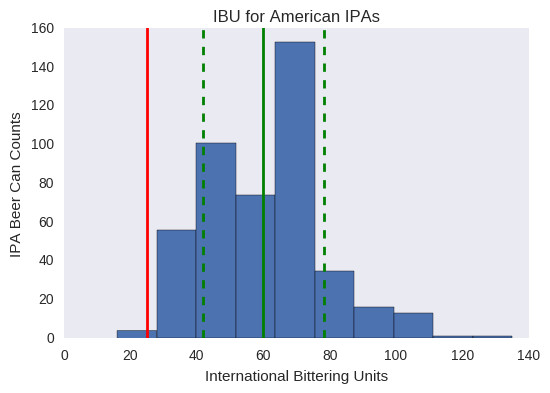

median                         : 61.000
mean                           : 59.987
standard deviation             : 18.185
max                            : 135.00
min                            : 16.00

median of all other beer types : 25.00



In [12]:
ipa_df = beer_df.loc[beer_df['style'].isin(['American IPA','American Pale Ale (APA)'])]
others_df = beer_df.loc[~beer_df['style'].isin(['American IPA','American Pale Ale (APA)'])]
all_other_median = np.median(others_df['ibu'].dropna())
median = np.median(ipa_df['ibu'].dropna())
mean = sum(ipa_df['ibu'].dropna())/len(ipa_df['ibu'].dropna())
sd = np.std(ipa_df['ibu'].dropna(), ddof=1)
plt.hist(ipa_df['ibu'].dropna())
plt.axvline(mean, color='g', linestyle='solid', linewidth=2)
plt.axvline(mean + sd, color='g', linestyle='dashed', linewidth=2)
plt.axvline(mean - sd, color='g', linestyle='dashed', linewidth=2)

plt.axvline(all_other_median, color='r', linestyle='solid', linewidth=2)

plt.xlabel('International Bittering Units')
plt.ylabel('IPA Beer Can Counts')
plt.title('IBU for American IPAs')
plt.show()
print('{:30s} : {:3.3f}'.format('median', median))
print('{:30s} : {:3.3f}'.format('mean', mean))
print('{:30s} : {:3.3f}'.format('standard deviation', sd))
print('{:30s} : {:3.2f}'.format('max', max(ipa_df['ibu'].dropna())))
print('{:30s} : {:3.2f}\n'.format('min', min(ipa_df['ibu'].dropna())))

print('{:18s} : {:3.2f}\n'.format('median of all other beer types', all_other_median))

Clearly the IPAs where skewing the IBU values  towards the right. The mean of his distribution is higher than when factoring in all beer types.  In fact, the red line in the above histogram is the median of all other beer types minus the IPAs. The IPAs have a much higher IBU than all other beer types in the dataset. Interestingly there still is quite a bit of spread in the data. Large amount of variability in IBUs amongst IPAs. There are many variables to consider when brewing an IPA.

#### Indian Pale Ale ABV vs IBU

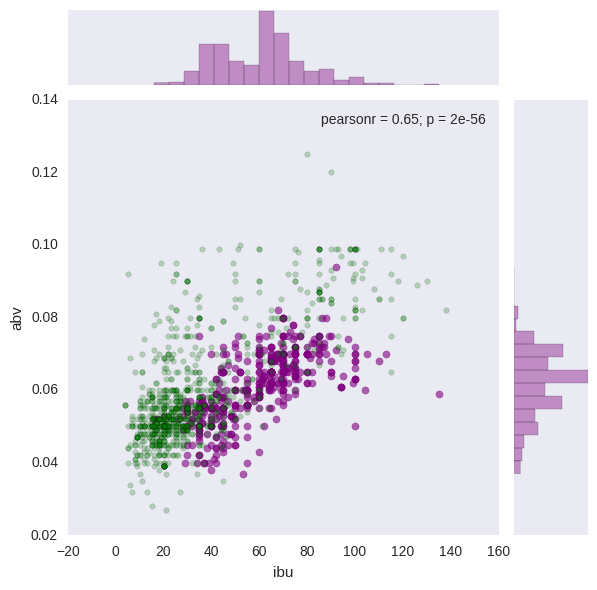

In [14]:
data = ipa_df.dropna()
g = sns.jointplot(x='ibu', y='abv', data=data, color='purple', s=27, alpha=0.6)
g.x = others_df['ibu']
g.y = others_df['abv']
g.plot_joint(plt.scatter, c='g', facecolors='none', s=15, alpha=0.25)

From the scatter plot there would appear to be a positive association between the ABV and the IBU for American style IPAs and APA. There is a positive correlation between the ABV and the IBU for this dataset of canned Indian Pale Ales. With such a small p-value there is a small probability of having a random dataset producing a correlation at least as extreme as the one computed from this dataset. Correlation does not imply causality. This just may imply that Americans like their IPAs to be strong and bitter.

The green makers within the above plot are the ABV vs IBU for all other beer types.  This is shown as a comparison to the Indian Pale Ales. There would appear to be no association between ABV and IBU across all other beer types. Most of the data points are clustered at lower end of ABV and IBU. This is not surprising as different styles of beer are brewed differently and with different ratios of ingredients.  

## 3. Further Research

Unfortunately this data is not a random sample from the larger population of American beers from small craft breweries. For one the dataset only contains information on canned beers. Nonetheless it is interesting to get a peak at America’s taste in beer.  

Having a larger and more representative sample would allow us to make insights into what type of beer America drinks and possible what are the regional differences.  What areas of the United States produce the most barley and hops? 
Craft beer brewing in certain states may be due of land availability, temperature and certain law regulations. Craft beers can be expensive. Perhaps the states with the most breweries are those with the most disposable income.  Another interesting question would be to look at longitudinal data and compare how the beers have changed overtime.

A larger more representative sample could be retrieved by web scrapping multiple sites that included bottled and canned beers. If such an endeavor was successful perhaps more beer traits could be retrieved.  Allowing for the creation of an algorithm that could learn to classify beers against these attributes (i.e, color, opaqueness, sugar content).

## References

https://www.brewersassociation.org/brewers-association/history/history-of-craft-beer/

https://en.wikipedia.org/wiki/Beer_in_the_United_States

https://www.kaggle.com/nickhould/craft-cans

https://en.wikipedia.org/wiki/List_of_countries_by_beer_consumption_per_capita

http://www.jeannicholashould.com/python-web-scraping-tutorial-for-craft-beers.html

http://www.efficientdrinker.com/beer/
